# Datasetovi - opis

Za air quality odabrali smo 3(ili samo ona 2) dataseta sa [sledeceg sajta](archive.ics.uci.edu/ml/datasets):
1. [Beijing Multi-Site Air-Quality Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data) - dataset sadrzi 6 glavnih polutanata i 6 glavnih meteoroloskih varijabli, merenih na nekoliko razlicitih sanica, svakog sata, oko Pekinga. Polja unutar dataseta su sledeca:
    1. No: row number
    1. year: year of data in this row
    1. month: month of data in this row
    1. day: day of data in this row
    1. hour: hour of data in this row
    1. PM2.5: PM2.5 concentration (ug/m^3)
    1. PM10: PM10 concentration (ug/m^3)
    1. SO2: SO2 concentration (ug/m^3)
    1. NO2: NO2 concentration (ug/m^3)
    1. CO: CO concentration (ug/m^3)
    1. O3: O3 concentration (ug/m^3)
    1. TEMP: temperature (degree Celsius)
    1. PRES: pressure (hPa)
    1. DEWP: dew point temperature (degree Celsius)
    1. RAIN: precipitation (mm)
    1. wd: wind direction
    1. WSPM: wind speed (m/s)
    1. station: name of the air-quality monitoring site


2. [Beijing PM2.5 Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data) - Sadrzi podatke iz US ambasade u Pekingu i glavnog aerodroma u Pekingu, takodje PM2.5 cestice merene svakog sata. Obelezja:
    1. No: row number
    1. year: year of data in this row
    1. month: month of data in this row
    1. day: day of data in this row
    1. hour: hour of data in this row
    1. pm2.5: PM2.5 concentration (ug/m^3)
    1. DEWP: Dew Point (â„ƒ)
    1. TEMP: Temperature (â„ƒ)
    1. PRES: Pressure (hPa)
    1. cbwd: Combined wind direction
    1. Iws: Cumulated wind speed (m/s)
    1. Is: Cumulated hours of snow
    1. Ir: Cumulated hours of rain


# Ucitavanje podataka

In [1]:
import pandas as pd

base_data_folder = "./Data"

## Beijing dataset

In [ ]:
beijing_folder = "/Beijing dataset"

In [ ]:
beijing_ds = pd.read_csv(base_data_folder + beijing_folder + "/Beijing.csv")
beijing_ds['datetime'] = pd.to_datetime(beijing_ds[['year', 'month', 'day', 'hour']])
beijing_ds.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
beijing_ds.rename(columns={'pm2.5': 'PM2.5'}, inplace=True)
beijing_ds.head(10)

In [ ]:
beijing_ds['No'].value_counts().fillna()

In [ ]:
beijing_ds.info()

In [ ]:
print(beijing_ds.isnull().sum(), "\n")
print(beijing_ds.isna().sum(), "\n")
print(beijing_ds.shape)

In [ ]:
beijing_ds.describe()

## PRSA dataset

In [2]:
prsa_folder = "/PRSA Data - Chinese cities"

In [185]:
import os
datasets = [pd.read_csv(base_data_folder + prsa_folder+ "/" + file) for file in os.listdir(base_data_folder + prsa_folder) if file.endswith('.csv')]

prsa_dataset = pd.concat(datasets, axis=0)

prsa_dataset['datetime'] = pd.to_datetime(prsa_dataset[['year', 'month', 'day', 'hour']])
prsa_dataset.index = prsa_dataset['datetime']

prsa_dataset.drop(columns=['year', 'month', 'day', 'hour', 'PM10', "SO2","NO2","CO","O3", "datetime"], inplace=True)
del datasets
prsa_dataset.head(10)

,No,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,
2013-03-01 00:00:00,1,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
2013-03-01 05:00:00,6,5.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
2013-03-01 06:00:00,7,3.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
2013-03-01 07:00:00,8,3.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
2013-03-01 08:00:00,9,3.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin


In [4]:
prsa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   PM2.5    412029 non-null  float64
 2   TEMP     420370 non-null  float64
 3   PRES     420375 non-null  float64
 4   DEWP     420365 non-null  float64
 5   RAIN     420378 non-null  float64
 6   wd       418946 non-null  object 
 7   WSPM     420450 non-null  float64
 8   station  420768 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 32.1+ MB


## EDA

In [145]:
print(prsa_dataset.isna().sum())
print("\n", prsa_dataset.shape)

No               0
PM2.5            0
TEMP             0
PRES             0
DEWP             0
RAIN             0
wd               0
WSPM             0
station          0
wd_encoded    1822
dtype: int64

 (420768, 10)


Let's fill the missing values using (linear) interpolation

In [186]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

# ax.plot(prsa_dataset.index, prsa_dataset['PM2.5'], linestyle="dotted", label="Original")
prsa_dataset.interpolate(method="linear",limit_direction="both", limit_area="inside", inplace=True)
# ax.plot(prsa_dataset.index, prsa_dataset['PM2.5'], linestyle="dotted", label="Interpolated")
# ax.set_title("Original and interpolated time series")
# ax.set_xlabel("Time")
# ax.set_ylabel("PM2.5")
# ax.legend()
# plt.show()

In [28]:
prsa_dataset['station'].value_counts()

Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

Vidimo da su, po kategorickom atributu 'stanice', redovi izbalansirani

<BarContainer object of 16 artists>

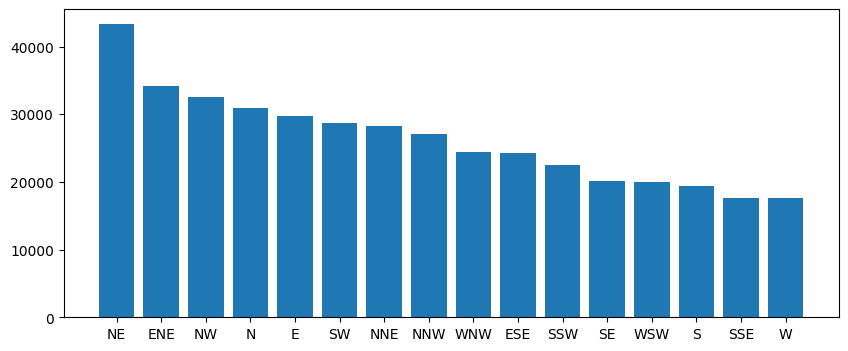

In [192]:
wind_direction = prsa_dataset['wd'].value_counts()

plt.figure(figsize=(10,4))
plt.bar(x=wind_direction.index, height=wind_direction)

In [50]:
prsa_dataset[prsa_dataset['wd'].isna()]['station'].value_counts()

Shunyi           483
Huairou          302
Gucheng          159
Changping        140
Dingling         140
Wanliu           123
Aotizhongxin      81
Guanyuan          81
Wanshouxigong     79
Dongsi            78
Nongzhanguan      78
Tiantan           78
Name: station, dtype: int64

In [51]:
prsa_dataset[prsa_dataset['station'] == 'Shunyi']['wd'].value_counts()

NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: wd, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
bar_data = 100 * prsa_dataset['wd'].value_counts() / prsa_dataset['wd'].value_counts().sum()

# #NOTE: Poasonova raspodela, plotovati nekako
lambd = 5
mean = np.mean(bar_data.values)
x_map = {x: i for i, x in enumerate(bar_data.index)}
x_numerical = [x_map[x] for x in bar_data.index]

# Calculate y-values for Poisson distribution
poisson_dist = stats.poisson.pmf(np.arange(len(bar_data.index)), mu=mean)

# Sort Poisson distribution data by frequency
sort_indices = np.argsort(poisson_dist)[::-1]
x_sorted = [x_numerical[i] for i in sort_indices]
y_sorted = [poisson_dist[i] * sum(bar_data.values) for i in sort_indices]

plt.figure(figsize=(15,10))
plt.bar(np.arange(len(bar_data.values)), bar_data.values, tick_label=bar_data.index)
plt.title('Value Counts and Poisson Distribution for Data')
plt.xlabel('Wind direction')
plt.ylabel('Class percentage')
plt.plot(x_sorted, y_sorted, 'r--', linewidth=2)
plt.show()

Kada je rec o kategorickoj varijabli 'wd', prati priblizno Poasonovu raspodelu

### Inicijalno uklanjanje nepozeljnih vrednosti

In [ ]:
# prsa_dataset.dropna(inplace=True, subset=['wd']) # Ne mozemo znati wind direction, ako nije specificiran?
# prsa_dataset.dropna(inplace=True, subset=['PM2.5'], how="all") # redovi koji u svih 5 kolona sadrze Null/NaN najverovatnije su neispravni
# prsa_dataset.dropna(inplace=True, subset=['TEMP', 'PRES', 'DEWP', 'RAIN'], how='any') # Svakako ima <100 redova koji imaju Null/NaN vrednosti u ovim poljima, mozemo ih ukloniti

### Enkodovanje kategorickih atributa

In [187]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

prsa_dataset['wd'] =np.where( prsa_dataset['wd'].isnull(), 'NULL', prsa_dataset['wd']) 
encoder = LabelEncoder()
encodings = encoder.fit_transform(prsa_dataset['wd'])
prsa_dataset['wd_encoded'] = encodings
prsa_dataset['wd_encoded'] = np.where(prsa_dataset['wd_encoded'] == 7, np.nan,prsa_dataset['wd_encoded'] )

In [188]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
prsa_dataset['wd_encoded'] = imp.fit_transform(prsa_dataset['wd_encoded'].values.reshape(-1,1)).astype(int)
prsa_dataset['wd_decoded'] = encoder.inverse_transform( prsa_dataset['wd_encoded'])
prsa_dataset.drop(['wd', 'wd_encoded'], axis=1, inplace=True)
prsa_dataset.rename(columns={'wd_decoded':'wd'}, inplace=True)

In [189]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['wd', 'station']

for abc in categorical_columns:
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
    encodings = one_hot_encoder.fit_transform(prsa_dataset[abc].values.reshape(-1,1))
    prsa_dataset[one_hot_encoder.categories_[0]] = encodings.toarray()
    prsa_dataset.drop(abc, axis=1) 

In [190]:
prsa_dataset.columns

Index(['No', 'PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station', 'wd',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'Aotizhongxin', 'Changping', 'Dingling',
       'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi',
       'Tiantan', 'Wanliu', 'Wanshouxigong'],
      dtype='object')

### Korelaciona matrica

In [110]:
correlation_matrix = prsa_dataset.corr(method='pearson')
correlation_matrix.style.background_gradient()

C:\Users\Zamachi\AppData\Local\Temp\ipykernel_14848\1204306241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = prsa_dataset.corr(method='pearson')


,No,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,nan,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
No,1.000000,-0.024719,-0.122671,0.188618,-0.102117,0.004812,0.054354,-0.009701,0.006319,-0.012774,-0.025606,0.037623,0.001705,0.016158,0.068003,-0.011403,0.013029,-0.008668,-0.021771,-0.002622,-0.048445,-0.012643,-0.038940,0.066756,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
PM2.5,-0.024719,1.000000,-0.131607,0.019862,0.113045,-0.014452,-0.271425,0.074517,0.065398,0.067799,-0.043651,0.026118,-0.029211,-0.081659,-0.101081,0.025671,0.045943,0.035058,0.012348,-0.001403,-0.015496,-0.071126,-0.007381,0.016637,0.010060,-0.032975,-0.048399,0.023482,0.011389,0.015774,-0.038505,0.019516,-0.001496,0.008170,0.013513,0.019472
TEMP,-0.122671,-0.131607,1.000000,-0.813312,0.820247,0.037647,0.032601,0.010849,-0.044190,0.041124,-0.050503,-0.080777,-0.036526,-0.066708,-0.093461,0.097824,0.050923,0.090947,0.111868,0.091833,-0.015935,-0.060780,0.044227,-0.039832,0.001311,0.003688,0.003688,0.003600,0.001311,0.008544,-0.029027,0.003600,-0.004117,0.003600,-0.002792,0.006593
PRES,0.188618,0.019862,-0.813312,1.000000,-0.750271,-0.060952,0.065400,-0.014989,0.039384,-0.036691,0.025149,0.072101,0.031058,0.034834,0.057764,-0.058175,-0.028157,-0.057331,-0.065369,-0.045238,-0.014589,0.018684,-0.027334,0.028779,0.031616,-0.085845,-0.085845,0.051772,0.031616,-0.055201,-0.090417,0.051772,0.066743,0.051772,0.010056,0.021960
DEWP,-0.102117,0.113045,0.820247,-0.750271,1.000000,0.086259,-0.296771,0.064063,0.024741,0.068988,-0.040580,-0.012022,-0.010217,-0.097252,-0.139604,0.060456,0.051713,0.065238,0.061320,0.040762,-0.015766,-0.103388,0.023878,-0.010308,0.013939,-0.021754,-0.021754,-0.000815,0.013939,0.002577,-0.005762,-0.000815,-0.000691,-0.000815,0.017074,0.004876
RAIN,0.004812,-0.014452,0.037647,-0.060952,0.086259,1.000000,0.020975,0.004311,0.012318,0.005393,-0.002872,0.008717,0.010710,-0.000442,-0.007562,-0.007160,-0.005937,-0.002909,-0.008302,-0.006068,0.005925,-0.005492,-0.005285,-0.003080,0.001085,-0.001520,-0.001520,-0.000164,0.001085,-0.000020,0.001294,-0.000164,-0.001256,-0.000164,0.001394,-0.000053
WSPM,0.054354,-0.271425,0.032601,0.065400,-0.296771,0.020975,1.000000,-0.092824,-0.092667,-0.036438,-0.025624,-0.086981,-0.042568,0.081542,0.171382,0.000443,-0.036867,-0.009558,0.019465,0.047685,-0.019037,0.159507,0.000164,-0.062190,-0.005189,0.030192,0.030192,0.031630,-0.005189,-0.093444,-0.018686,0.031630,0.018804,0.031630,-0.055297,0.003728
E,-0.009701,0.074517,0.010849,-0.014989,0.064063,0.004311,-0.092824,1.000000,-0.081971,-0.068171,-0.077615,-0.093467,-0.073976,-0.069808,-0.079939,-0.060653,-0.061741,-0.057794,-0.065661,-0.074709,-0.057570,-0.068402,-0.061686,-0.018191,0.004316,-0.001756,-0.001756,0.036385,0.004316,-0.029263,-0.010746,0.036385,-0.044492,0.036385,-0.040769,0.010992
ENE,0.006319,0.065398,-0.044190,0.039384,0.024741,0.012318,-0.092667,-0.081971,1.000000,-0.073441,-0.083615,-0.100693,-0.079695,-0.075204,-0.086119,-0.065341,-0.066513,-0.062261,-0.070737,-0.080485,-0.062021,-0.073690,-0.066454,-0.019597,0.034793,-0.048502,-0.048502,0.031990,0.034793,-0.030237,-0.025797,0.031990,-0.045007,0.031990,0.025094,0.007395
ESE,-0.012774,0.067799,0.041124,-0.036691,0.068988,0.005393,-0.036438,-0.068171,-0.073441,1.000000,-0.069538,-0.083741,-0.066278,-0.062543,-0.071621,-0.054341,-0.055316,-0.051780,-0.058828,-0.066935,-0.051579,-0.061284,-0.055267,-0.016298,-0.011125,0.028341,0.028341,0.025388,-0.011125,-0.024563,0.000135,0.025388,-0.023677,0.025388,-0.053397,-0.009094


# Prvo se otarasiti Null/NaN vrednosti
# ?
# Splitovati dataset na train/test